# Part A
#### *By Romina Goodarzi*

### Task 1

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df_det = pd.read_excel('det_epsus.xlsx')
df_fundq = pd.read_excel('fundq.xlsx')

# Standardize the column names for case-insensitivity
df_det.columns = df_det.columns.str.upper()
df_fundq.columns = df_fundq.columns.str.upper()

mean_by_ticker = df_det.groupby('TICKER')['ACTUAL'].transform('mean')
df_det['ACTUAL'] = df_det['ACTUAL'].fillna(mean_by_ticker)

#drop duplicate
duplicate_rows = df_det.duplicated().sum()
df_det = df_det.drop_duplicates()

#merging two excels together
df_merged = pd.merge(df_det, df_fundq, on='TICKER')
df_merged = df_merged.drop(columns=['GVKEY'])

In [10]:
# Turning date time columns into datetime format
df_merged['FPEDATS'] = pd.to_datetime(df_merged['FPEDATS'])
df_merged['ANNDATS'] = pd.to_datetime(df_merged['ANNDATS'])
df_merged['RDQ'] = pd.to_datetime(df_merged['RDQ'])

# Creating the first variable
df_merged['ACTUAL_EPS_Quarter'] = df_merged.loc[df_merged['FPEDATS'] == pd.Timestamp('2020-03-31'), 'ACTUAL']

#Second variable
df_merged['FORECAST_EPS_Quarter'] = None

# creating a for to ensure that only rows whitin the  mentioned ANNDATS 
#are considered in the newly created FORECAST_EPS_Quarter
 
for index, row in df_merged.iterrows():
    if row['FPEDATS'] == pd.Timestamp('2020-03-31') and \
       row['ANNDATS'] >= pd.Timestamp('2020-01-01') and \
       row['ANNDATS'] <= pd.Timestamp('2020-03-31'):
        df_merged.at[index, 'FORECAST_EPS_Quarter'] = row['VALUE']
                
#third variable
df_merged['FORECAST_EPS_Last_Anual'] = None

# creating a for to ensure that only rows whitin the  mentioned ANNDATS (anouncement date) 
#are considered in the newly created FORECAST_EPS_Last_Anual
for index, row in df_merged.iterrows():
    if row['FPEDATS'] == pd.Timestamp('2020-12-31') and \
       row['ANNDATS'] >= pd.Timestamp('2020-01-01') and \
       row['ANNDATS'] <= pd.Timestamp('2020-03-31'):
        df_merged.at[index, 'FORECAST_EPS_Last_Anual'] = row['VALUE']
                
#fourth variable
df_merged['FORECAST_EPS_First_Anual'] = None

# creating a for to ensure that only rows whitin the  mentioned ANNDATS (anouncement date) 
#are considered in the newly created FORECAST_EPS_First_Anual
for index, row in df_merged.iterrows():
    if row['FPEDATS'] == pd.Timestamp('2020-12-31') and \
       row['RDQ'] >= pd.Timestamp('2020-01-01') and \
       row['ANNDATS'] <= pd.Timestamp('2020-06-30'):
        df_merged.at[index, 'FORECAST_EPS_First_Anual'] = row['VALUE']


### Task 2

In [11]:
# Replacing NaN  with 0
#I did this because sometimes the first column had no values, 
#this means I could not get a value by subtracting it from another column 
df_merged['FORECAST_EPS_Quarter'].fillna(0, inplace=True)
df_merged['ACTUAL_EPS_Quarter'].fillna(0, inplace=True)
df_merged['FORECAST_EPS_Last_Anual'].fillna(0, inplace=True)
df_merged['FORECAST_EPS_First_Anual'].fillna(0, inplace=True)


#Comparison between actual and forecasted EPS
#first main variable
df_merged['Comparison1'] = df_merged['FORECAST_EPS_Quarter'] - df_merged['ACTUAL_EPS_Quarter']

#Comparison between new forecast minus old forecast
#second main variable
df_merged['Comparison2'] = df_merged['FORECAST_EPS_Last_Anual'] - df_merged['FORECAST_EPS_First_Anual']

#creating the ATQ/CSHOQ variable
df_merged['ATQ/CSHOQ'] = df_merged['ATQ'] / df_merged['CSHOQ']

#scaling the two variables
df_merged['Comparison1_scaled'] = df_merged['Comparison1'] / df_merged['ATQ/CSHOQ']
df_merged['Comparison2_scaled'] = df_merged['Comparison2'] / df_merged['ATQ/CSHOQ']

#number of unique analyst for each unique company
# I Grouped by 'CONM' and counted the unique values in the 'ANALYS' column
#This shows number of anlysts following the firm
unique_analyst = df_merged.groupby('CONM')['ANALYS'].nunique()

# Print the result
print(unique_analyst)

# Filter out rows where 'FPEDATS' is in 201
#this is optional. this is because for 2019 we can't have 
df_merged = df_merged[df_merged['FPEDATS'].dt.year != 2019]

df_merged.head()

CONM
3M CO                           18
ABBOTT LABORATORIES             18
ABBVIE INC                      15
ACTIVISION BLIZZARD INC         34
ADVANCE AUTO PARTS INC          22
                                ..
YUM BRANDS INC                  26
ZEBRA TECHNOLOGIES CP  -CL A    10
ZIMMER BIOMET HOLDINGS INC      27
ZIONS BANCORPORATION NA         22
ZOETIS INC                      17
Name: ANALYS, Length: 372, dtype: int64


,TICKER,ANNDATS,FPI,FPEDATS,ANALYS,VALUE,ACTUAL,DATADATE,CONM,RDQ,...,CIK,ACTUAL_EPS_Quarter,FORECAST_EPS_Quarter,FORECAST_EPS_Last_Anual,FORECAST_EPS_First_Anual,Comparison1,Comparison2,ATQ/CSHOQ,Comparison1_scaled,Comparison2_scaled
0,003H,2020-02-05,6,2020-03-31,131972,1.294,1.33,2020-03-31,PAYCOM SOFTWARE INC,2020-04-28,...,1590955,1.33,1.294,0.0,0.0,-0.036,0.0,40.084082,-0.000898,0.0
1,003H,2020-02-05,6,2020-03-31,72445,1.280,1.33,2020-03-31,PAYCOM SOFTWARE INC,2020-04-28,...,1590955,1.33,1.280,0.0,0.0,-0.050,0.0,40.084082,-0.001247,0.0
2,003H,2020-02-05,6,2020-03-31,120469,1.277,1.33,2020-03-31,PAYCOM SOFTWARE INC,2020-04-28,...,1590955,1.33,1.277,0.0,0.0,-0.053,0.0,40.084082,-0.001322,0.0
3,003H,2020-02-06,6,2020-03-31,89516,1.290,1.33,2020-03-31,PAYCOM SOFTWARE INC,2020-04-28,...,1590955,1.33,1.290,0.0,0.0,-0.040,0.0,40.084082,-0.000998,0.0
4,003H,2020-02-06,6,2020-03-31,152759,1.130,1.33,2020-03-31,PAYCOM SOFTWARE INC,2020-04-28,...,1590955,1.33,1.130,0.0,0.0,-0.200,0.0,40.084082,-0.004990,0.0


### Task 3

        Comparison1   Comparison2
count  40228.000000  40228.000000
mean      -0.054577     -1.404630
std        0.758214      5.212964
min      -44.960000   -194.320000
25%        0.000000     -0.670000
50%        0.000000      0.000000
75%        0.000000      0.000000
max       17.970000     46.050000


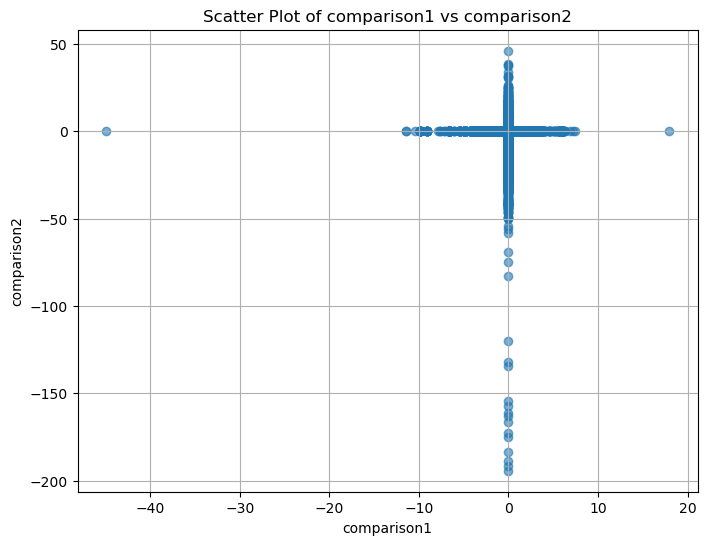

file saved
Index(['FPEDATS', 'CONM', 'ACTUAL_EPS_Quarter', 'FORECAST_EPS_Quarter',
       'FORECAST_EPS_Last_Anual', 'FORECAST_EPS_First_Anual', 'Comparison1',
       'Comparison2', 'Comparison1_scaled', 'Comparison2_scaled'],
      dtype='object')
       Comparison1  Comparison2
count  1114.000000  1114.000000
mean     -0.092822    -0.943798
std       0.519288     3.737745
min      -7.905000  -101.459500
25%      -0.049412    -0.836965
50%       0.000000     0.000000
75%       0.000000     0.000000
max       4.819523     9.348256


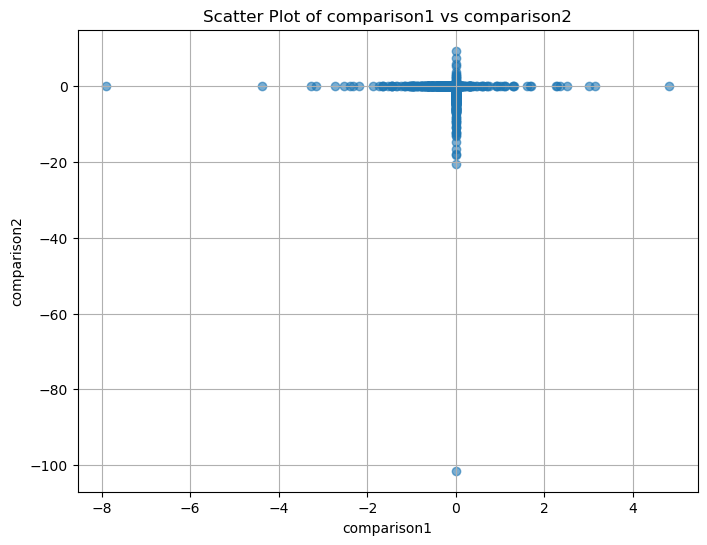

In [12]:
#DESCRIPTIVE ANALYSIS
descriptive_stats = df_merged[['Comparison1', 'Comparison2']].describe()
print(descriptive_stats)

#SCATTER PLOT
plt.figure(figsize=(8, 6))
plt.scatter(df_merged['Comparison1'], df_merged['Comparison2'], alpha=0.6)
plt.title('Scatter Plot of comparison1 vs comparison2')
plt.xlabel('comparison1')
plt.ylabel('comparison2')
plt.grid(True)
plt.show()


# Group by 'FPEDATS' and 'CONM' and calculate the mean for the specified columns
df_grouped = df_merged.groupby(['FPEDATS', 'CONM'], as_index=False)[
    ['ACTUAL_EPS_Quarter', 'FORECAST_EPS_Quarter', 
     'FORECAST_EPS_Last_Anual', 'FORECAST_EPS_First_Anual', 'Comparison1', 'Comparison2' , 'Comparison1_scaled' , 'Comparison2_scaled']].mean()

df_grouped.to_excel(r'E:\Project\data analyse with python\merged2.xlsx', index=False)
print('file saved')
print(df_grouped.columns)

#DESCRIPTIVE ANALYSIS AFTER GROUPING
descriptive_stats = df_grouped[['Comparison1', 'Comparison2']].describe()
print(descriptive_stats)

#SCATTER PLOT
plt.figure(figsize=(8, 6))
plt.scatter(df_grouped['Comparison1'], df_grouped['Comparison2'], alpha=0.6)
plt.title('Scatter Plot of comparison1 vs comparison2')
plt.xlabel('comparison1')
plt.ylabel('comparison2')
plt.grid(True)
plt.show()

### Task 4

TICKER                      0
ANNDATS                     0
FPI                         0
FPEDATS                     0
ANALYS                      0
VALUE                       0
ACTUAL                      0
DATADATE                    0
CONM                        0
RDQ                         0
ATQ                         0
CSHOQ                       0
CIK                         0
ACTUAL_EPS_Quarter          0
FORECAST_EPS_Quarter        0
FORECAST_EPS_Last_Anual     0
FORECAST_EPS_First_Anual    0
Comparison1                 0
Comparison2                 0
ATQ/CSHOQ                   0
Comparison1_scaled          0
Comparison2_scaled          0
dtype: int64
Company: 3M CO, Pearson Correlation: 0.8408581619855899
Company: 3M CO, Linear Regression Equation: y = 3.65x + 0.82
Company: ABBOTT LABORATORIES, Pearson Correlation: 0.8262708178254042
Company: ABBOTT LABORATORIES, Linear Regression Equation: y = 1.44x + 0.14
Company: ABBVIE INC, Pearson Correlation: 0.8568819144431151
Comp

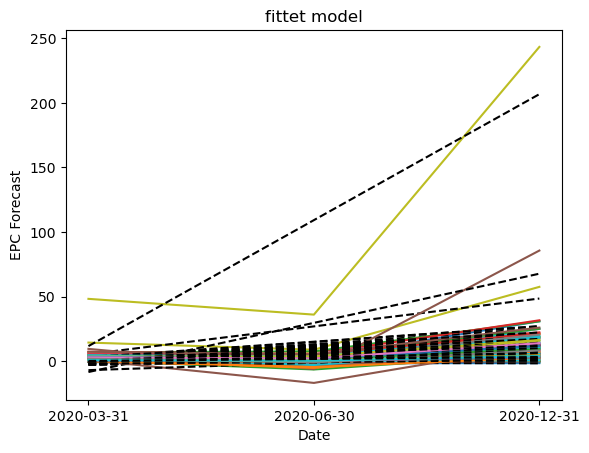

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Group by 'FPEDATS' and 'CONM' and calculating the mean for VALUE (EPC forecast) column
df_grouped = df_merged.groupby(['FPEDATS', 'CONM'], as_index=False)[['VALUE','ACTUAL']].mean()
# Filtering rows where FPEDATS is 2019
df_merged = df_merged[df_merged['FPEDATS'].dt.year != 2019]

#inspecting nan values
nan_count = df_merged.isna().sum()
print(nan_count)

# Turning FPEDATS to datetime format
df_merged['FPEDATS'] = pd.to_datetime(df_merged['FPEDATS'])

# Filter data for the required dates
#these three dates have the corresponding x value for each company
required_dates = pd.to_datetime(['2020-03-31', '2020-06-30', '2020-12-31'])
filtered_data = df_merged[df_merged['FPEDATS'].isin(required_dates)]

results = []

for company, group in filtered_data.groupby('CONM'):
    # Extract values for the specific dates
    x1 = group[group['FPEDATS'] == pd.Timestamp('2020-03-31')]['VALUE'].iloc[0] if not group[group['FPEDATS'] == pd.Timestamp('2020-03-31')].empty else None
    x2 = group[group['FPEDATS'] == pd.Timestamp('2020-06-30')]['VALUE'].iloc[0] if not group[group['FPEDATS'] == pd.Timestamp('2020-06-30')].empty else None
    x3 = group[group['FPEDATS'] == pd.Timestamp('2020-12-31')]['VALUE'].iloc[0] if not group[group['FPEDATS'] == pd.Timestamp('2020-12-31')].empty else None

    values = [x for x in [x1, x2, x3] if x is not None]  # Filtering None values

    # Skip if there are less than 3 valid data points
    if len(values) == 3:
        
        #dates are considered as x. they are considered as 0, 1, 2 respectively
        x_numeric = np.array([0, 1, 2]).reshape(-1, 1)  
        # Corresponding 'VALUE' for each date
        y_numeric = np.array(values)
        
        #pearson correlation
        corr, _ = pearsonr(values, [0, 1, 2]) 
        print(f"Company: {company}, Pearson Correlation: {corr}")

        # fitting linear regression
        model = LinearRegression()
        model.fit(x_numeric, y_numeric)

        #I called the attributes of the defined class in the model object
        slope = model.coef_[0]
        intercept = model.intercept_

        # Equation of the linear regression: y = mx + b
        print(f"Company: {company}, Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

        # Plot the values and the regression line
        plt.plot(['2020-03-31', '2020-06-30', '2020-12-31'], values, label=f'{company}')
        plt.plot(['2020-03-31', '2020-06-30', '2020-12-31'], model.predict(x_numeric), linestyle='--', color='black')

    else:
        print(f"{company} skipped")

# Show the plot
plt.xlabel('Date')
plt.ylabel('EPC Forecast')
plt.title('fittet model')
plt.show()